###**author : Bitingo Josaphat JB**

---

So far we have built sequential model. But below we will build functional model [=> More information on these two is here:](https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057)


---

Check The author's [Email:](https://mail.google.com/mail/bitingojosaphat@gmail.com)



In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 26.7 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv')

df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 2)

In [ ]:
df_ham = df[df['Category'] == 'ham']
df_ham.shape

(4825, 2)

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [ ]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [ ]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
df_balanced.sample(5)

,Category,Message
594,ham,You still at grand prix?
3302,spam,RCT' THNQ Adrian for U text. Rgds Vatian
3123,spam,Free entry in 2 a weekly comp for a chance to ...
1048,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
1380,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...


In [ ]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x == 'spam' else 0)

df_balanced.sample(10)

,Category,Message,spam
4249,spam,"accordingly. I repeat, just text the word ok o...",1
1592,ham,That's my honeymoon outfit. :),0
139,spam,You'll not rcv any more msgs from the chat svc...,1
5428,ham,You didnt complete your gist oh.,0
460,ham,Going thru a very different feeling.wavering d...,0
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,0
2984,ham,What should i eat fo lunch senor,0
3420,spam,Do you want a new Video phone? 600 anytime any...,1
4904,ham,I;m reaching in another 2 stops.,0
1502,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify = df_balanced['spam'])

In [ ]:
X_train.sample(5)

3571    Customer Loyalty Offer:The NEW Nokia6650 Mobil...
4861    Response is one of d powerful weapon 2 occupy ...
1448    Don‘t give a flying monkeys wot they think and...
839     We tried to contact you re our offer of New Vi...
1146    Thank you, winner notified by sms. Good Luck! ...
Name: Message, dtype: object

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_encoder_model = hub.KerasLayer(encoder_url)

In [ ]:
def get_sentence_embedding(sentences):
  preprocess_text = bert_preprocess_model(sentences)
  return bert_encoder_model(preprocess_text)['pooled_output']


get_sentence_embedding([
                        '500$ discount. hurry up',
                        'Bhavin, are you up for a volleyball game tomorrow?'
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351707, -0.5132727 , -0.88845736, ..., -0.74748856,
        -0.7531474 ,  0.91964495],
       [-0.8205969 , -0.5209497 , -0.9524535 , ..., -0.8804192 ,
        -0.70536846,  0.8252003 ]], dtype=float32)>

In [ ]:
e = get_sentence_embedding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [ ]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606917 , -0.14219375,  0.49604657, ...,  0.4216535 ,
        -0.5322139 ,  0.80312175],
       [-0.86023194, -0.21242912,  0.49157023, ...,  0.39798135,
        -0.6050627 ,  0.8447164 ],
       [-0.7128861 , -0.154639  ,  0.38401696, ...,  0.35278732,
        -0.5099133 ,  0.734741  ],
       [-0.8253345 , -0.3555056 , -0.59069616, ..., -0.01613677,
        -0.6141757 ,  0.8723029 ],
       [-0.7504135 , -0.2681262 , -0.266897  , ...,  0.02839394,
        -0.5938099 ,  0.7974987 ],
       [-0.78544354, -0.29949662,  0.41027504, ...,  0.5222545 ,
        -0.49573535,  0.8150749 ]], dtype=float32)>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]],[e[1]])

array([[0.9911089]], dtype=float32)

In [ ]:
cosine_similarity([e[2]],[e[4]])

array([[0.8964416]], dtype=float32)

In [ ]:
cosine_similarity([e[1]],[e[5]])

array([[0.96105796]], dtype=float32)

BERT layers with a Functional System

In [ ]:
#bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess_model(text_input)
outputs = bert_encoder_model(preprocessed_text)

#Neural network Layers
l = tf.keras.layers.Dropout(0.1, name = 'dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(l)


# construct My Final Model
model = tf.keras.Model(inputs = [text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name = 'Accuracy'),
           tf.keras.metrics.Precision(name='Precision'),
           tf.keras.metrics.Recall(name = 'recall')
]


model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = METRICS)

In [ ]:
model.fit(X_train, y_train, epochs = 10 )

Epoch 1/10
35/35 [==============================] - 458s 13s/step - loss: 0.6454 - Accuracy: 0.6152 - Precision: 0.6118 - recall: 0.6304
Epoch 2/10
35/35 [==============================] - 444s 13s/step - loss: 0.5272 - Accuracy: 0.8054 - Precision: 0.7969 - recall: 0.8196
Epoch 3/10
35/35 [==============================] - 445s 13s/step - loss: 0.4502 - Accuracy: 0.8509 - Precision: 0.8248 - recall: 0.8911
Epoch 4/10
35/35 [==============================] - 444s 13s/step - loss: 0.4112 - Accuracy: 0.8562 - Precision: 0.8364 - recall: 0.8857
Epoch 5/10
35/35 [==============================] - 444s 13s/step - loss: 0.3758 - Accuracy: 0.8759 - Precision: 0.8687 - recall: 0.8857
Epoch 6/10
35/35 [==============================] - 444s 13s/step - loss: 0.3463 - Accuracy: 0.8893 - Precision: 0.8733 - recall: 0.9107
Epoch 7/10
35/35 [==============================] - 442s 13s/step - loss: 0.3385 - Accuracy: 0.8750 - Precision: 0.8608 - recall: 0.8946
Epoch 8/10
35/35 [=======================

In [ ]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 150s 12s/step - loss: 0.2620 - Accuracy: 0.9305 - Precision: 0.9351 - recall: 0.9251


[0.2619578540325165,
 0.9304812550544739,
 0.9351351261138916,
 0.9251337051391602]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted >0.5, 1, 0)
y_predicted

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_predicted)
cm

array([[175,  12],
       [ 14, 173]])

Text(33.0, 0.5, 'Truth')

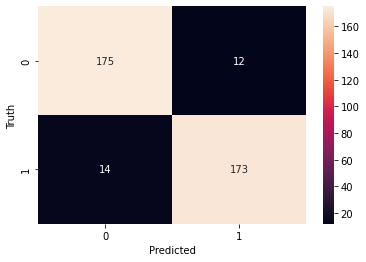

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       187
           1       0.94      0.93      0.93       187

    accuracy                           0.93       374
   macro avg       0.93      0.93      0.93       374
weighted avg       0.93      0.93      0.93       374



In [58]:
reviews = [
    'Reply to win Â£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

array([[0.7393502 ],
       [0.79432786],
       [0.7093926 ],
       [0.1537818 ],
       [0.09400374]], dtype=float32)